In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from disp import set_plot

LOAD_DIR = 'data/simple/mlv/rsvr'
PFX = 'rsvr'

TARG_BHV = 'MTN'
TWDWS = [.03, 1, 60]
TARGS = [f'{TARG_BHV}_MN_{twdw}' for twdw in TWDWS]

In [2]:
fnames = [fname for fname in os.listdir(LOAD_DIR) if fname.startswith(PFX)]

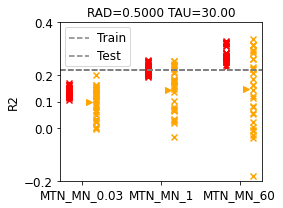

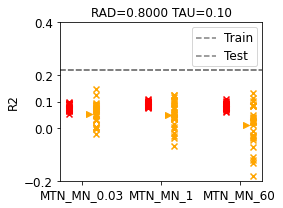

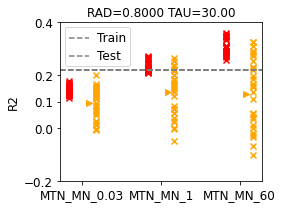

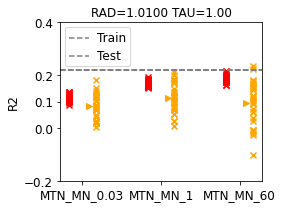

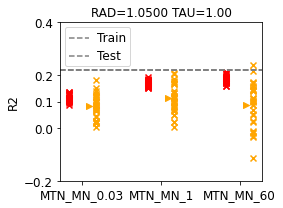

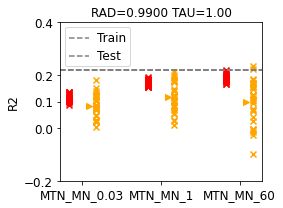

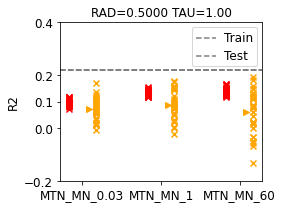

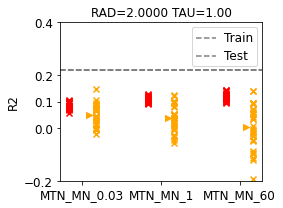

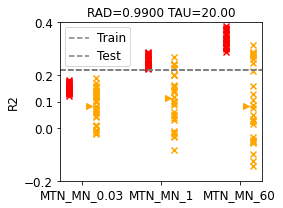

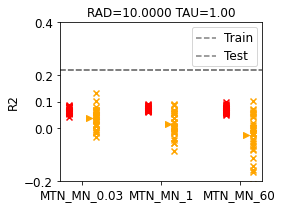

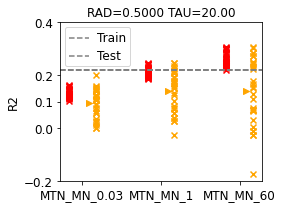

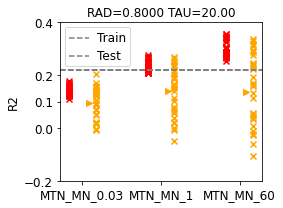

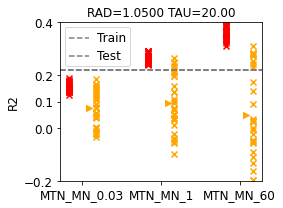

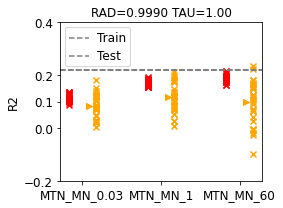

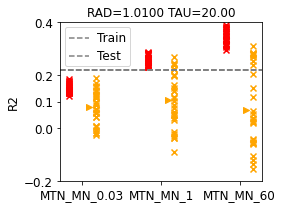

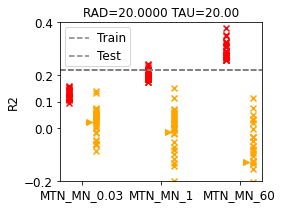

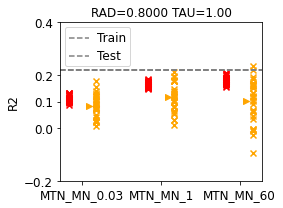

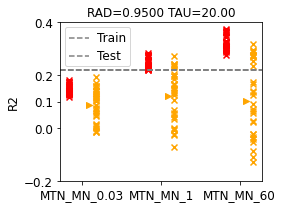

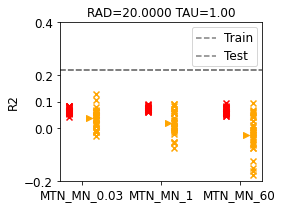

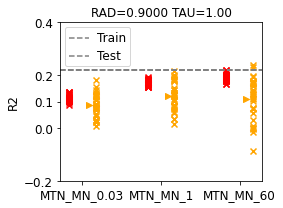

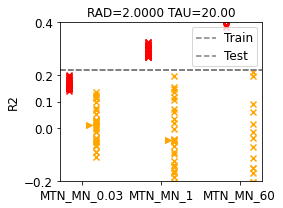

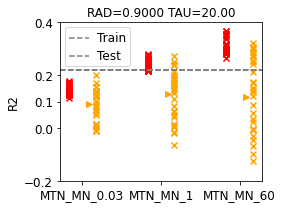

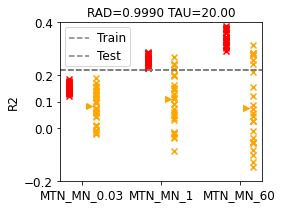

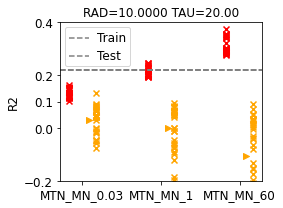

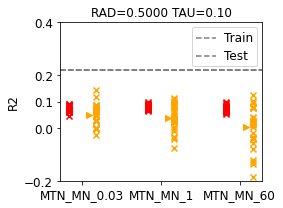

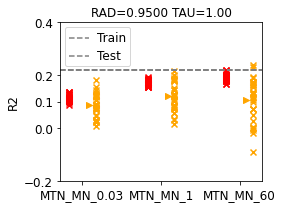

In [3]:
for fname in fnames:
    
    data = np.load(os.path.join(LOAD_DIR, fname), allow_pickle=True)[0]
    
    r2_trains = data['R2_TRAINS']
    r2_tests = data['R2_TESTS']
    
    radius = data['RADIUS']
    tau = data['TAU']
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
    
    for ctarg, targ in enumerate(TARGS):
        ax.scatter(3*ctarg*np.ones(len(r2_trains[targ])), r2_trains[targ], c='r', marker='x')
        ax.scatter((3*ctarg+1)*np.ones(len(r2_tests[targ])), r2_tests[targ], c='orange', marker='x')
        ax.scatter((3*ctarg+.75), np.mean(r2_tests[targ]), marker='>', c='orange')
        ax.axhline(0.22, color='gray', ls='--')
    
    ax.legend(['Train', 'Test'])
        
    set_plot(ax, y_lim=(-.2, .4), y_ticks=[-.2, 0, .1, .2, .4], x_ticks=[.5, 3.5, 6.5], x_tick_labels=TARGS, y_label='R2', title=f'RAD={radius:.4f} TAU={tau:.2f}')